In [4]:
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
from PIL import Image
import numpy as np
import os
import os.path
import json
import random

# Randomly sample 100,000 images from the training set
train_file = '/home/ec2-user/SageMaker/efs/amazon-bin/input/counting_train.json'

with open(train_file) as f:
          data_list = json.loads(f.read())

#Randomly select 10,000 images for model development
random.Random(4).shuffle(data_list)
data_list_sample = data_list[0:10000]
print(len(data_list_sample))

10000


(array([ 310., 1150., 2115., 2445., 2262., 1718.]),
 array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
        4.16666667, 5.        ]),
 <a list of 6 Patch objects>)

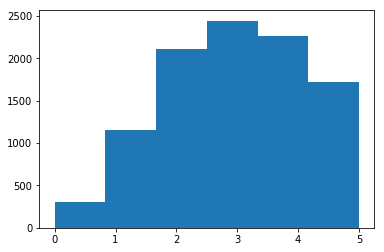

In [5]:
from matplotlib import pyplot as plt

# Distribution of various counts in the training set
labels = np.empty((len(data_list_sample), ), dtype=np.int)
for idx,data in enumerate(data_list_sample):
    labels[idx] = data[1]

plt.hist(labels, bins = 6, density = False)

In [12]:
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
import skimage.io
import skimage.transform
import matplotlib.pyplot as plt
import numpy as np
#Create blob features for each image
img_path = '/home/ec2-user/SageMaker/efs/amazon-bin/data/bin-images/'
model_input = '/home/ec2-user/SageMaker/efs/amazon-bin/data/model-input/train_blobs.txt'
training = np.empty((10000, 224 * 3), dtype=np.int16)


for idx,data in enumerate(data_list_sample):
#     if idx > 0:
#         break
    print("**Starting image ", idx)
    img_name = '%05d.jpg' % (data[0])
    img = os.path.join(img_path, img_name)
    img_data = skimage.io.imread(img)
    img_data_resize = skimage.transform.resize(img_data, (224,224,3))
    image_gray = rgb2gray(img_data_resize)
    #blobs log
    blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)
    
    training_tmp = np.zeros((224, 224), dtype=np.int8)
    
    for j in range(blobs_log.shape[0]):
        x = blobs_log[j, 0]
        y = blobs_log[j, 1]
        val = np.int(blobs_log[j, 2])
        
        training_tmp[int(x),int(y)] = val
    
    training_sum = np.zeros((1, 224), dtype=np.int16)
    training_max = np.zeros((1, 224), dtype=np.int16)
    training_count = np.zeros((1, 224), dtype=np.int16)
    training_mean = np.zeros((1, 224), dtype=np.int16)
    for k in range(training_tmp.shape[0]):
            
        sum1 = np.sum(training_tmp[k, :])
        max1 = np.max(training_tmp[k, :])
        count1 = np.sum(training_tmp[k, :] > 0)
        
        training_sum[0, k] = sum1
        training_max[0, k] = max1
        training_count[0, k] = count1
        
    training[idx, :] =  np.column_stack((training_sum,training_max, training_count)) 
    
# Saving training set to file
np.savetxt(model_input, training, delimiter=',', fmt='%i')
print(np.sum((blobs_log[:, 2])))
print(np.sum(training))

**Starting image  0
**Starting image  1


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


**Starting image  2
**Starting image  3
**Starting image  4
**Starting image  5
**Starting image  6
**Starting image  7
**Starting image  8
**Starting image  9
**Starting image  10
**Starting image  11
**Starting image  12
**Starting image  13
**Starting image  14
**Starting image  15
**Starting image  16
**Starting image  17
**Starting image  18
**Starting image  19
**Starting image  20
**Starting image  21
**Starting image  22
**Starting image  23
**Starting image  24
**Starting image  25
**Starting image  26
**Starting image  27
**Starting image  28
**Starting image  29
**Starting image  30
**Starting image  31
**Starting image  32
**Starting image  33
**Starting image  34
**Starting image  35
**Starting image  36
**Starting image  37
**Starting image  38
**Starting image  39
**Starting image  40
**Starting image  41
**Starting image  42
**Starting image  43
**Starting image  44
**Starting image  45
**Starting image  46
**Starting image  47
**Starting image  48
**Starting image  49


**Starting image  380
**Starting image  381
**Starting image  382
**Starting image  383
**Starting image  384
**Starting image  385
**Starting image  386
**Starting image  387
**Starting image  388
**Starting image  389
**Starting image  390
**Starting image  391
**Starting image  392
**Starting image  393
**Starting image  394
**Starting image  395
**Starting image  396
**Starting image  397
**Starting image  398
**Starting image  399
**Starting image  400
**Starting image  401
**Starting image  402
**Starting image  403
**Starting image  404
**Starting image  405
**Starting image  406
**Starting image  407
**Starting image  408
**Starting image  409
**Starting image  410
**Starting image  411
**Starting image  412
**Starting image  413
**Starting image  414
**Starting image  415
**Starting image  416
**Starting image  417
**Starting image  418
**Starting image  419
**Starting image  420
**Starting image  421
**Starting image  422
**Starting image  423
**Starting image  424
**Starting

**Starting image  753
**Starting image  754
**Starting image  755
**Starting image  756
**Starting image  757
**Starting image  758
**Starting image  759
**Starting image  760
**Starting image  761
**Starting image  762
**Starting image  763
**Starting image  764
**Starting image  765
**Starting image  766
**Starting image  767
**Starting image  768
**Starting image  769
**Starting image  770
**Starting image  771
**Starting image  772
**Starting image  773
**Starting image  774
**Starting image  775
**Starting image  776
**Starting image  777
**Starting image  778
**Starting image  779
**Starting image  780
**Starting image  781
**Starting image  782
**Starting image  783
**Starting image  784
**Starting image  785
**Starting image  786
**Starting image  787
**Starting image  788
**Starting image  789
**Starting image  790
**Starting image  791
**Starting image  792
**Starting image  793
**Starting image  794
**Starting image  795
**Starting image  796
**Starting image  797
**Starting

**Starting image  1120
**Starting image  1121
**Starting image  1122
**Starting image  1123
**Starting image  1124
**Starting image  1125
**Starting image  1126
**Starting image  1127
**Starting image  1128
**Starting image  1129
**Starting image  1130
**Starting image  1131
**Starting image  1132
**Starting image  1133
**Starting image  1134
**Starting image  1135
**Starting image  1136
**Starting image  1137
**Starting image  1138
**Starting image  1139
**Starting image  1140
**Starting image  1141
**Starting image  1142
**Starting image  1143
**Starting image  1144
**Starting image  1145
**Starting image  1146
**Starting image  1147
**Starting image  1148
**Starting image  1149
**Starting image  1150
**Starting image  1151
**Starting image  1152
**Starting image  1153
**Starting image  1154
**Starting image  1155
**Starting image  1156
**Starting image  1157
**Starting image  1158
**Starting image  1159
**Starting image  1160
**Starting image  1161
**Starting image  1162
**Starting 

**Starting image  1478
**Starting image  1479
**Starting image  1480
**Starting image  1481
**Starting image  1482
**Starting image  1483
**Starting image  1484
**Starting image  1485
**Starting image  1486
**Starting image  1487
**Starting image  1488
**Starting image  1489
**Starting image  1490
**Starting image  1491
**Starting image  1492
**Starting image  1493
**Starting image  1494
**Starting image  1495
**Starting image  1496
**Starting image  1497
**Starting image  1498
**Starting image  1499
**Starting image  1500
**Starting image  1501
**Starting image  1502
**Starting image  1503
**Starting image  1504
**Starting image  1505
**Starting image  1506
**Starting image  1507
**Starting image  1508
**Starting image  1509
**Starting image  1510
**Starting image  1511
**Starting image  1512
**Starting image  1513
**Starting image  1514
**Starting image  1515
**Starting image  1516
**Starting image  1517
**Starting image  1518
**Starting image  1519
**Starting image  1520
**Starting 

**Starting image  1835
**Starting image  1836
**Starting image  1837
**Starting image  1838
**Starting image  1839
**Starting image  1840
**Starting image  1841
**Starting image  1842
**Starting image  1843
**Starting image  1844
**Starting image  1845
**Starting image  1846
**Starting image  1847
**Starting image  1848
**Starting image  1849
**Starting image  1850
**Starting image  1851
**Starting image  1852
**Starting image  1853
**Starting image  1854
**Starting image  1855
**Starting image  1856
**Starting image  1857
**Starting image  1858
**Starting image  1859
**Starting image  1860
**Starting image  1861
**Starting image  1862
**Starting image  1863
**Starting image  1864
**Starting image  1865
**Starting image  1866
**Starting image  1867
**Starting image  1868
**Starting image  1869
**Starting image  1870
**Starting image  1871
**Starting image  1872
**Starting image  1873
**Starting image  1874
**Starting image  1875
**Starting image  1876
**Starting image  1877
**Starting 

**Starting image  2194
**Starting image  2195
**Starting image  2196
**Starting image  2197
**Starting image  2198
**Starting image  2199
**Starting image  2200
**Starting image  2201
**Starting image  2202
**Starting image  2203
**Starting image  2204
**Starting image  2205
**Starting image  2206
**Starting image  2207
**Starting image  2208
**Starting image  2209
**Starting image  2210
**Starting image  2211
**Starting image  2212
**Starting image  2213
**Starting image  2214
**Starting image  2215
**Starting image  2216
**Starting image  2217
**Starting image  2218
**Starting image  2219
**Starting image  2220
**Starting image  2221
**Starting image  2222
**Starting image  2223
**Starting image  2224
**Starting image  2225
**Starting image  2226
**Starting image  2227
**Starting image  2228
**Starting image  2229
**Starting image  2230
**Starting image  2231
**Starting image  2232
**Starting image  2233
**Starting image  2234
**Starting image  2235
**Starting image  2236
**Starting 

**Starting image  2551
**Starting image  2552
**Starting image  2553
**Starting image  2554
**Starting image  2555
**Starting image  2556
**Starting image  2557
**Starting image  2558
**Starting image  2559
**Starting image  2560
**Starting image  2561
**Starting image  2562
**Starting image  2563
**Starting image  2564
**Starting image  2565
**Starting image  2566
**Starting image  2567
**Starting image  2568
**Starting image  2569
**Starting image  2570
**Starting image  2571
**Starting image  2572
**Starting image  2573
**Starting image  2574
**Starting image  2575
**Starting image  2576
**Starting image  2577
**Starting image  2578
**Starting image  2579
**Starting image  2580
**Starting image  2581
**Starting image  2582
**Starting image  2583
**Starting image  2584
**Starting image  2585
**Starting image  2586
**Starting image  2587
**Starting image  2588
**Starting image  2589
**Starting image  2590
**Starting image  2591
**Starting image  2592
**Starting image  2593
**Starting 

**Starting image  2908
**Starting image  2909
**Starting image  2910
**Starting image  2911
**Starting image  2912
**Starting image  2913
**Starting image  2914
**Starting image  2915
**Starting image  2916
**Starting image  2917
**Starting image  2918
**Starting image  2919
**Starting image  2920
**Starting image  2921
**Starting image  2922
**Starting image  2923
**Starting image  2924
**Starting image  2925
**Starting image  2926
**Starting image  2927
**Starting image  2928
**Starting image  2929
**Starting image  2930
**Starting image  2931
**Starting image  2932
**Starting image  2933
**Starting image  2934
**Starting image  2935
**Starting image  2936
**Starting image  2937
**Starting image  2938
**Starting image  2939
**Starting image  2940
**Starting image  2941
**Starting image  2942
**Starting image  2943
**Starting image  2944
**Starting image  2945
**Starting image  2946
**Starting image  2947
**Starting image  2948
**Starting image  2949
**Starting image  2950
**Starting 

**Starting image  3265
**Starting image  3266
**Starting image  3267
**Starting image  3268
**Starting image  3269
**Starting image  3270
**Starting image  3271
**Starting image  3272
**Starting image  3273
**Starting image  3274
**Starting image  3275
**Starting image  3276
**Starting image  3277
**Starting image  3278
**Starting image  3279
**Starting image  3280
**Starting image  3281
**Starting image  3282
**Starting image  3283
**Starting image  3284
**Starting image  3285
**Starting image  3286
**Starting image  3287
**Starting image  3288
**Starting image  3289
**Starting image  3290
**Starting image  3291
**Starting image  3292
**Starting image  3293
**Starting image  3294
**Starting image  3295
**Starting image  3296
**Starting image  3297
**Starting image  3298
**Starting image  3299
**Starting image  3300
**Starting image  3301
**Starting image  3302
**Starting image  3303
**Starting image  3304
**Starting image  3305
**Starting image  3306
**Starting image  3307
**Starting 

**Starting image  3623
**Starting image  3624
**Starting image  3625
**Starting image  3626
**Starting image  3627
**Starting image  3628
**Starting image  3629
**Starting image  3630
**Starting image  3631
**Starting image  3632
**Starting image  3633
**Starting image  3634
**Starting image  3635
**Starting image  3636
**Starting image  3637
**Starting image  3638
**Starting image  3639
**Starting image  3640
**Starting image  3641
**Starting image  3642
**Starting image  3643
**Starting image  3644
**Starting image  3645
**Starting image  3646
**Starting image  3647
**Starting image  3648
**Starting image  3649
**Starting image  3650
**Starting image  3651
**Starting image  3652
**Starting image  3653
**Starting image  3654
**Starting image  3655
**Starting image  3656
**Starting image  3657
**Starting image  3658
**Starting image  3659
**Starting image  3660
**Starting image  3661
**Starting image  3662
**Starting image  3663
**Starting image  3664
**Starting image  3665
**Starting 

**Starting image  3980
**Starting image  3981
**Starting image  3982
**Starting image  3983
**Starting image  3984
**Starting image  3985
**Starting image  3986
**Starting image  3987
**Starting image  3988
**Starting image  3989
**Starting image  3990
**Starting image  3991
**Starting image  3992
**Starting image  3993
**Starting image  3994
**Starting image  3995
**Starting image  3996
**Starting image  3997
**Starting image  3998
**Starting image  3999
**Starting image  4000
**Starting image  4001
**Starting image  4002
**Starting image  4003
**Starting image  4004
**Starting image  4005
**Starting image  4006
**Starting image  4007
**Starting image  4008
**Starting image  4009
**Starting image  4010
**Starting image  4011
**Starting image  4012
**Starting image  4013
**Starting image  4014
**Starting image  4015
**Starting image  4016
**Starting image  4017
**Starting image  4018
**Starting image  4019
**Starting image  4020
**Starting image  4021
**Starting image  4022
**Starting 

**Starting image  4337
**Starting image  4338
**Starting image  4339
**Starting image  4340
**Starting image  4341
**Starting image  4342
**Starting image  4343
**Starting image  4344
**Starting image  4345
**Starting image  4346
**Starting image  4347
**Starting image  4348
**Starting image  4349
**Starting image  4350
**Starting image  4351
**Starting image  4352
**Starting image  4353
**Starting image  4354
**Starting image  4355
**Starting image  4356
**Starting image  4357
**Starting image  4358
**Starting image  4359
**Starting image  4360
**Starting image  4361
**Starting image  4362
**Starting image  4363
**Starting image  4364
**Starting image  4365
**Starting image  4366
**Starting image  4367
**Starting image  4368
**Starting image  4369
**Starting image  4370
**Starting image  4371
**Starting image  4372
**Starting image  4373
**Starting image  4374
**Starting image  4375
**Starting image  4376
**Starting image  4377
**Starting image  4378
**Starting image  4379
**Starting 

**Starting image  4695
**Starting image  4696
**Starting image  4697
**Starting image  4698
**Starting image  4699
**Starting image  4700
**Starting image  4701
**Starting image  4702
**Starting image  4703
**Starting image  4704
**Starting image  4705
**Starting image  4706
**Starting image  4707
**Starting image  4708
**Starting image  4709
**Starting image  4710
**Starting image  4711
**Starting image  4712
**Starting image  4713
**Starting image  4714
**Starting image  4715
**Starting image  4716
**Starting image  4717
**Starting image  4718
**Starting image  4719
**Starting image  4720
**Starting image  4721
**Starting image  4722
**Starting image  4723
**Starting image  4724
**Starting image  4725
**Starting image  4726
**Starting image  4727
**Starting image  4728
**Starting image  4729
**Starting image  4730
**Starting image  4731
**Starting image  4732
**Starting image  4733
**Starting image  4734
**Starting image  4735
**Starting image  4736
**Starting image  4737
**Starting 

**Starting image  5053
**Starting image  5054
**Starting image  5055
**Starting image  5056
**Starting image  5057
**Starting image  5058
**Starting image  5059
**Starting image  5060
**Starting image  5061
**Starting image  5062
**Starting image  5063
**Starting image  5064
**Starting image  5065
**Starting image  5066
**Starting image  5067
**Starting image  5068
**Starting image  5069
**Starting image  5070
**Starting image  5071
**Starting image  5072
**Starting image  5073
**Starting image  5074
**Starting image  5075
**Starting image  5076
**Starting image  5077
**Starting image  5078
**Starting image  5079
**Starting image  5080
**Starting image  5081
**Starting image  5082
**Starting image  5083
**Starting image  5084
**Starting image  5085
**Starting image  5086
**Starting image  5087
**Starting image  5088
**Starting image  5089
**Starting image  5090
**Starting image  5091
**Starting image  5092
**Starting image  5093
**Starting image  5094
**Starting image  5095
**Starting 

**Starting image  5410
**Starting image  5411
**Starting image  5412
**Starting image  5413
**Starting image  5414
**Starting image  5415
**Starting image  5416
**Starting image  5417
**Starting image  5418
**Starting image  5419
**Starting image  5420
**Starting image  5421
**Starting image  5422
**Starting image  5423
**Starting image  5424
**Starting image  5425
**Starting image  5426
**Starting image  5427
**Starting image  5428
**Starting image  5429
**Starting image  5430
**Starting image  5431
**Starting image  5432
**Starting image  5433
**Starting image  5434
**Starting image  5435
**Starting image  5436
**Starting image  5437
**Starting image  5438
**Starting image  5439
**Starting image  5440
**Starting image  5441
**Starting image  5442
**Starting image  5443
**Starting image  5444
**Starting image  5445
**Starting image  5446
**Starting image  5447
**Starting image  5448
**Starting image  5449
**Starting image  5450
**Starting image  5451
**Starting image  5452
**Starting 

**Starting image  5767
**Starting image  5768
**Starting image  5769
**Starting image  5770
**Starting image  5771
**Starting image  5772
**Starting image  5773
**Starting image  5774
**Starting image  5775
**Starting image  5776
**Starting image  5777
**Starting image  5778
**Starting image  5779
**Starting image  5780
**Starting image  5781
**Starting image  5782
**Starting image  5783
**Starting image  5784
**Starting image  5785
**Starting image  5786
**Starting image  5787
**Starting image  5788
**Starting image  5789
**Starting image  5790
**Starting image  5791
**Starting image  5792
**Starting image  5793
**Starting image  5794
**Starting image  5795
**Starting image  5796
**Starting image  5797
**Starting image  5798
**Starting image  5799
**Starting image  5800
**Starting image  5801
**Starting image  5802
**Starting image  5803
**Starting image  5804
**Starting image  5805
**Starting image  5806
**Starting image  5807
**Starting image  5808
**Starting image  5809
**Starting 

**Starting image  6124
**Starting image  6125
**Starting image  6126
**Starting image  6127
**Starting image  6128
**Starting image  6129
**Starting image  6130
**Starting image  6131
**Starting image  6132
**Starting image  6133
**Starting image  6134
**Starting image  6135
**Starting image  6136
**Starting image  6137
**Starting image  6138
**Starting image  6139
**Starting image  6140
**Starting image  6141
**Starting image  6142
**Starting image  6143
**Starting image  6144
**Starting image  6145
**Starting image  6146
**Starting image  6147
**Starting image  6148
**Starting image  6149
**Starting image  6150
**Starting image  6151
**Starting image  6152
**Starting image  6153
**Starting image  6154
**Starting image  6155
**Starting image  6156
**Starting image  6157
**Starting image  6158
**Starting image  6159
**Starting image  6160
**Starting image  6161
**Starting image  6162
**Starting image  6163
**Starting image  6164
**Starting image  6165
**Starting image  6166
**Starting 

**Starting image  6483
**Starting image  6484
**Starting image  6485
**Starting image  6486
**Starting image  6487
**Starting image  6488
**Starting image  6489
**Starting image  6490
**Starting image  6491
**Starting image  6492
**Starting image  6493
**Starting image  6494
**Starting image  6495
**Starting image  6496
**Starting image  6497
**Starting image  6498
**Starting image  6499
**Starting image  6500
**Starting image  6501
**Starting image  6502
**Starting image  6503
**Starting image  6504
**Starting image  6505
**Starting image  6506
**Starting image  6507
**Starting image  6508
**Starting image  6509
**Starting image  6510
**Starting image  6511
**Starting image  6512
**Starting image  6513
**Starting image  6514
**Starting image  6515
**Starting image  6516
**Starting image  6517
**Starting image  6518
**Starting image  6519
**Starting image  6520
**Starting image  6521
**Starting image  6522
**Starting image  6523
**Starting image  6524
**Starting image  6525
**Starting 

**Starting image  6840
**Starting image  6841
**Starting image  6842
**Starting image  6843
**Starting image  6844
**Starting image  6845
**Starting image  6846
**Starting image  6847
**Starting image  6848
**Starting image  6849
**Starting image  6850
**Starting image  6851
**Starting image  6852
**Starting image  6853
**Starting image  6854
**Starting image  6855
**Starting image  6856
**Starting image  6857
**Starting image  6858
**Starting image  6859
**Starting image  6860
**Starting image  6861
**Starting image  6862
**Starting image  6863
**Starting image  6864
**Starting image  6865
**Starting image  6866
**Starting image  6867
**Starting image  6868
**Starting image  6869
**Starting image  6870
**Starting image  6871
**Starting image  6872
**Starting image  6873
**Starting image  6874
**Starting image  6875
**Starting image  6876
**Starting image  6877
**Starting image  6878
**Starting image  6879
**Starting image  6880
**Starting image  6881
**Starting image  6882
**Starting 

**Starting image  7197
**Starting image  7198
**Starting image  7199
**Starting image  7200
**Starting image  7201
**Starting image  7202
**Starting image  7203
**Starting image  7204
**Starting image  7205
**Starting image  7206
**Starting image  7207
**Starting image  7208
**Starting image  7209
**Starting image  7210
**Starting image  7211
**Starting image  7212
**Starting image  7213
**Starting image  7214
**Starting image  7215
**Starting image  7216
**Starting image  7217
**Starting image  7218
**Starting image  7219
**Starting image  7220
**Starting image  7221
**Starting image  7222
**Starting image  7223
**Starting image  7224
**Starting image  7225
**Starting image  7226
**Starting image  7227
**Starting image  7228
**Starting image  7229
**Starting image  7230
**Starting image  7231
**Starting image  7232
**Starting image  7233
**Starting image  7234
**Starting image  7235
**Starting image  7236
**Starting image  7237
**Starting image  7238
**Starting image  7239
**Starting 

**Starting image  7554
**Starting image  7555
**Starting image  7556
**Starting image  7557
**Starting image  7558
**Starting image  7559
**Starting image  7560
**Starting image  7561
**Starting image  7562
**Starting image  7563
**Starting image  7564
**Starting image  7565
**Starting image  7566
**Starting image  7567
**Starting image  7568
**Starting image  7569
**Starting image  7570
**Starting image  7571
**Starting image  7572
**Starting image  7573
**Starting image  7574
**Starting image  7575
**Starting image  7576
**Starting image  7577
**Starting image  7578
**Starting image  7579
**Starting image  7580
**Starting image  7581
**Starting image  7582
**Starting image  7583
**Starting image  7584
**Starting image  7585
**Starting image  7586
**Starting image  7587
**Starting image  7588
**Starting image  7589
**Starting image  7590
**Starting image  7591
**Starting image  7592
**Starting image  7593
**Starting image  7594
**Starting image  7595
**Starting image  7596
**Starting 

**Starting image  7911
**Starting image  7912
**Starting image  7913
**Starting image  7914
**Starting image  7915
**Starting image  7916
**Starting image  7917
**Starting image  7918
**Starting image  7919
**Starting image  7920
**Starting image  7921
**Starting image  7922
**Starting image  7923
**Starting image  7924
**Starting image  7925
**Starting image  7926
**Starting image  7927
**Starting image  7928
**Starting image  7929
**Starting image  7930
**Starting image  7931
**Starting image  7932
**Starting image  7933
**Starting image  7934
**Starting image  7935
**Starting image  7936
**Starting image  7937
**Starting image  7938
**Starting image  7939
**Starting image  7940
**Starting image  7941
**Starting image  7942
**Starting image  7943
**Starting image  7944
**Starting image  7945
**Starting image  7946
**Starting image  7947
**Starting image  7948
**Starting image  7949
**Starting image  7950
**Starting image  7951
**Starting image  7952
**Starting image  7953
**Starting 

**Starting image  8268
**Starting image  8269
**Starting image  8270
**Starting image  8271
**Starting image  8272
**Starting image  8273
**Starting image  8274
**Starting image  8275
**Starting image  8276
**Starting image  8277
**Starting image  8278
**Starting image  8279
**Starting image  8280
**Starting image  8281
**Starting image  8282
**Starting image  8283
**Starting image  8284
**Starting image  8285
**Starting image  8286
**Starting image  8287
**Starting image  8288
**Starting image  8289
**Starting image  8290
**Starting image  8291
**Starting image  8292
**Starting image  8293
**Starting image  8294
**Starting image  8295
**Starting image  8296
**Starting image  8297
**Starting image  8298
**Starting image  8299
**Starting image  8300
**Starting image  8301
**Starting image  8302
**Starting image  8303
**Starting image  8304
**Starting image  8305
**Starting image  8306
**Starting image  8307
**Starting image  8308
**Starting image  8309
**Starting image  8310
**Starting 

**Starting image  8625
**Starting image  8626
**Starting image  8627
**Starting image  8628
**Starting image  8629
**Starting image  8630
**Starting image  8631
**Starting image  8632
**Starting image  8633
**Starting image  8634
**Starting image  8635
**Starting image  8636
**Starting image  8637
**Starting image  8638
**Starting image  8639
**Starting image  8640
**Starting image  8641
**Starting image  8642
**Starting image  8643
**Starting image  8644
**Starting image  8645
**Starting image  8646
**Starting image  8647
**Starting image  8648
**Starting image  8649
**Starting image  8650
**Starting image  8651
**Starting image  8652
**Starting image  8653
**Starting image  8654
**Starting image  8655
**Starting image  8656
**Starting image  8657
**Starting image  8658
**Starting image  8659
**Starting image  8660
**Starting image  8661
**Starting image  8662
**Starting image  8663
**Starting image  8664
**Starting image  8665
**Starting image  8666
**Starting image  8667
**Starting 

**Starting image  8983
**Starting image  8984
**Starting image  8985
**Starting image  8986
**Starting image  8987
**Starting image  8988
**Starting image  8989
**Starting image  8990
**Starting image  8991
**Starting image  8992
**Starting image  8993
**Starting image  8994
**Starting image  8995
**Starting image  8996
**Starting image  8997
**Starting image  8998
**Starting image  8999
**Starting image  9000
**Starting image  9001
**Starting image  9002
**Starting image  9003
**Starting image  9004
**Starting image  9005
**Starting image  9006
**Starting image  9007
**Starting image  9008
**Starting image  9009
**Starting image  9010
**Starting image  9011
**Starting image  9012
**Starting image  9013
**Starting image  9014
**Starting image  9015
**Starting image  9016
**Starting image  9017
**Starting image  9018
**Starting image  9019
**Starting image  9020
**Starting image  9021
**Starting image  9022
**Starting image  9023
**Starting image  9024
**Starting image  9025
**Starting 

**Starting image  9340
**Starting image  9341
**Starting image  9342
**Starting image  9343
**Starting image  9344
**Starting image  9345
**Starting image  9346
**Starting image  9347
**Starting image  9348
**Starting image  9349
**Starting image  9350
**Starting image  9351
**Starting image  9352
**Starting image  9353
**Starting image  9354
**Starting image  9355
**Starting image  9356
**Starting image  9357
**Starting image  9358
**Starting image  9359
**Starting image  9360
**Starting image  9361
**Starting image  9362
**Starting image  9363
**Starting image  9364
**Starting image  9365
**Starting image  9366
**Starting image  9367
**Starting image  9368
**Starting image  9369
**Starting image  9370
**Starting image  9371
**Starting image  9372
**Starting image  9373
**Starting image  9374
**Starting image  9375
**Starting image  9376
**Starting image  9377
**Starting image  9378
**Starting image  9379
**Starting image  9380
**Starting image  9381
**Starting image  9382
**Starting 

**Starting image  9698
**Starting image  9699
**Starting image  9700
**Starting image  9701
**Starting image  9702
**Starting image  9703
**Starting image  9704
**Starting image  9705
**Starting image  9706
**Starting image  9707
**Starting image  9708
**Starting image  9709
**Starting image  9710
**Starting image  9711
**Starting image  9712
**Starting image  9713
**Starting image  9714
**Starting image  9715
**Starting image  9716
**Starting image  9717
**Starting image  9718
**Starting image  9719
**Starting image  9720
**Starting image  9721
**Starting image  9722
**Starting image  9723
**Starting image  9724
**Starting image  9725
**Starting image  9726
**Starting image  9727
**Starting image  9728
**Starting image  9729
**Starting image  9730
**Starting image  9731
**Starting image  9732
**Starting image  9733
**Starting image  9734
**Starting image  9735
**Starting image  9736
**Starting image  9737
**Starting image  9738
**Starting image  9739
**Starting image  9740
**Starting 

In [49]:
# Saving Labels
np.savetxt('/home/ec2-user/SageMaker/efs/amazon-bin/data/model-input/label_blobs.txt', labels, delimiter=',', fmt='%i')

In [52]:
# Saving data list sample Data
np.savetxt('/home/ec2-user/SageMaker/efs/amazon-bin/data/model-input/data_list_samples_blob.txt', data_list_sample, delimiter=',', fmt='%i')

In [13]:
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
# Train SVM Model
clf = svm.SVC()
clf.fit(training, labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
from sklearn.metrics import classification_report,accuracy_score
y_pred = clf.predict(training)

print("Classification report for classifier %s:\n%s\n"
      % (clf, classification_report(labels, y_pred)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.64      0.18      0.29       310
          1       0.69      0.57      0.63      1150
          2       0.72      0.86      0.78      2115
          3       0.74      0.89      0.81      2445
          4       0.82      0.84      0.83      2262
          5       0.99      0.69      0.81      1718

avg / total       0.79      0.78      0.77     10000




In [21]:
# Creating the test set 
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
from PIL import Image
import numpy as np
import os
import os.path
import json
import random

# Randomly sample 100,000 images from the training set
val_file = '/home/ec2-user/SageMaker/efs/amazon-bin/input/counting_val.json'

with open(val_file) as f:
          val_data_list = json.loads(f.read())

#Randomly select 10,000 images for model development
random.Random(4).shuffle(val_data_list)
val_data_list_sample = val_data_list[0:2000]
print(len(val_data_list_sample))

2000


(array([ 52., 229., 440., 500., 443., 336.]),
 array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
        4.16666667, 5.        ]),
 <a list of 6 Patch objects>)

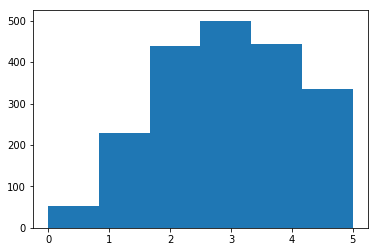

In [22]:
# Distribution of test set 
from matplotlib import pyplot as plt

# Distribution of various counts in the training set
labels_val = np.empty((len(val_data_list_sample), ), dtype=np.int)
for idx,data in enumerate(val_data_list_sample):
    labels_val[idx] = data[1]

plt.hist(labels_val, bins = 6, density = False)

In [23]:
# Creating test dataset

from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
import skimage.io
import skimage.transform
import matplotlib.pyplot as plt
import numpy as np
#Create blob features for each image
img_path = '/home/ec2-user/SageMaker/efs/amazon-bin/data/bin-images/'
val_x = np.empty((2000, 224 * 3), dtype=np.int16)


for idx,data in enumerate(val_data_list_sample):
#     if idx > 0:
#         break
    print("**Starting image ", idx)
    img_name = '%05d.jpg' % (data[0])
    img = os.path.join(img_path, img_name)
    img_data = skimage.io.imread(img)
    img_data_resize = skimage.transform.resize(img_data, (224,224,3))
    image_gray = rgb2gray(img_data_resize)
    #blobs log
    blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)
    
    training_tmp = np.zeros((224, 224), dtype=np.int8)
    
    for j in range(blobs_log.shape[0]):
        x = blobs_log[j, 0]
        y = blobs_log[j, 1]
        val = np.int(blobs_log[j, 2])
        
        training_tmp[int(x),int(y)] = val
    
    training_sum = np.zeros((1, 224), dtype=np.int16)
    training_max = np.zeros((1, 224), dtype=np.int16)
    training_count = np.zeros((1, 224), dtype=np.int16)
    training_mean = np.zeros((1, 224), dtype=np.int16)
    for k in range(training_tmp.shape[0]):
            
        sum1 = np.sum(training_tmp[k, :])
        max1 = np.max(training_tmp[k, :])
        count1 = np.sum(training_tmp[k, :] > 0)
        
        training_sum[0, k] = sum1
        training_max[0, k] = max1
        training_count[0, k] = count1
        
    val_x[idx, :] =  np.column_stack((training_sum,training_max, training_count)) 

**Starting image  0


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


**Starting image  1
**Starting image  2
**Starting image  3
**Starting image  4
**Starting image  5
**Starting image  6
**Starting image  7
**Starting image  8
**Starting image  9
**Starting image  10
**Starting image  11
**Starting image  12
**Starting image  13
**Starting image  14
**Starting image  15
**Starting image  16
**Starting image  17
**Starting image  18
**Starting image  19
**Starting image  20
**Starting image  21
**Starting image  22
**Starting image  23
**Starting image  24
**Starting image  25
**Starting image  26
**Starting image  27
**Starting image  28
**Starting image  29
**Starting image  30
**Starting image  31
**Starting image  32
**Starting image  33
**Starting image  34
**Starting image  35
**Starting image  36
**Starting image  37
**Starting image  38
**Starting image  39
**Starting image  40
**Starting image  41
**Starting image  42
**Starting image  43
**Starting image  44
**Starting image  45
**Starting image  46
**Starting image  47
**Starting image  48
*

**Starting image  379
**Starting image  380
**Starting image  381
**Starting image  382
**Starting image  383
**Starting image  384
**Starting image  385
**Starting image  386
**Starting image  387
**Starting image  388
**Starting image  389
**Starting image  390
**Starting image  391
**Starting image  392
**Starting image  393
**Starting image  394
**Starting image  395
**Starting image  396
**Starting image  397
**Starting image  398
**Starting image  399
**Starting image  400
**Starting image  401
**Starting image  402
**Starting image  403
**Starting image  404
**Starting image  405
**Starting image  406
**Starting image  407
**Starting image  408
**Starting image  409
**Starting image  410
**Starting image  411
**Starting image  412
**Starting image  413
**Starting image  414
**Starting image  415
**Starting image  416
**Starting image  417
**Starting image  418
**Starting image  419
**Starting image  420
**Starting image  421
**Starting image  422
**Starting image  423
**Starting

**Starting image  752
**Starting image  753
**Starting image  754
**Starting image  755
**Starting image  756
**Starting image  757
**Starting image  758
**Starting image  759
**Starting image  760
**Starting image  761
**Starting image  762
**Starting image  763
**Starting image  764
**Starting image  765
**Starting image  766
**Starting image  767
**Starting image  768
**Starting image  769
**Starting image  770
**Starting image  771
**Starting image  772
**Starting image  773
**Starting image  774
**Starting image  775
**Starting image  776
**Starting image  777
**Starting image  778
**Starting image  779
**Starting image  780
**Starting image  781
**Starting image  782
**Starting image  783
**Starting image  784
**Starting image  785
**Starting image  786
**Starting image  787
**Starting image  788
**Starting image  789
**Starting image  790
**Starting image  791
**Starting image  792
**Starting image  793
**Starting image  794
**Starting image  795
**Starting image  796
**Starting

**Starting image  1119
**Starting image  1120
**Starting image  1121
**Starting image  1122
**Starting image  1123
**Starting image  1124
**Starting image  1125
**Starting image  1126
**Starting image  1127
**Starting image  1128
**Starting image  1129
**Starting image  1130
**Starting image  1131
**Starting image  1132
**Starting image  1133
**Starting image  1134
**Starting image  1135
**Starting image  1136
**Starting image  1137
**Starting image  1138
**Starting image  1139
**Starting image  1140
**Starting image  1141
**Starting image  1142
**Starting image  1143
**Starting image  1144
**Starting image  1145
**Starting image  1146
**Starting image  1147
**Starting image  1148
**Starting image  1149
**Starting image  1150
**Starting image  1151
**Starting image  1152
**Starting image  1153
**Starting image  1154
**Starting image  1155
**Starting image  1156
**Starting image  1157
**Starting image  1158
**Starting image  1159
**Starting image  1160
**Starting image  1161
**Starting 

**Starting image  1476
**Starting image  1477
**Starting image  1478
**Starting image  1479
**Starting image  1480
**Starting image  1481
**Starting image  1482
**Starting image  1483
**Starting image  1484
**Starting image  1485
**Starting image  1486
**Starting image  1487
**Starting image  1488
**Starting image  1489
**Starting image  1490
**Starting image  1491
**Starting image  1492
**Starting image  1493
**Starting image  1494
**Starting image  1495
**Starting image  1496
**Starting image  1497
**Starting image  1498
**Starting image  1499
**Starting image  1500
**Starting image  1501
**Starting image  1502
**Starting image  1503
**Starting image  1504
**Starting image  1505
**Starting image  1506
**Starting image  1507
**Starting image  1508
**Starting image  1509
**Starting image  1510
**Starting image  1511
**Starting image  1512
**Starting image  1513
**Starting image  1514
**Starting image  1515
**Starting image  1516
**Starting image  1517
**Starting image  1518
**Starting 

**Starting image  1833
**Starting image  1834
**Starting image  1835
**Starting image  1836
**Starting image  1837
**Starting image  1838
**Starting image  1839
**Starting image  1840
**Starting image  1841
**Starting image  1842
**Starting image  1843
**Starting image  1844
**Starting image  1845
**Starting image  1846
**Starting image  1847
**Starting image  1848
**Starting image  1849
**Starting image  1850
**Starting image  1851
**Starting image  1852
**Starting image  1853
**Starting image  1854
**Starting image  1855
**Starting image  1856
**Starting image  1857
**Starting image  1858
**Starting image  1859
**Starting image  1860
**Starting image  1861
**Starting image  1862
**Starting image  1863
**Starting image  1864
**Starting image  1865
**Starting image  1866
**Starting image  1867
**Starting image  1868
**Starting image  1869
**Starting image  1870
**Starting image  1871
**Starting image  1872
**Starting image  1873
**Starting image  1874
**Starting image  1875
**Starting 

In [25]:
# Testing the model on the val dataset
from sklearn.metrics import classification_report,accuracy_score
y_val_pred = clf.predict(val_x)

print("Classification report for classifier %s:\n%s\n"
      % (clf, classification_report(labels_val, y_val_pred)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.25      0.04      0.07        52
          1       0.27      0.17      0.21       229
          2       0.25      0.22      0.23       440
          3       0.26      0.53      0.35       500
          4       0.23      0.22      0.23       443
          5       0.27      0.02      0.03       336

avg / total       0.26      0.25      0.22      2000




In [27]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix:\n%s" % confusion_matrix(labels_val, y_val_pred))

Confusion matrix:
[[  2  17  11  18   4   0]
 [  2  39  50  88  46   4]
 [  0  28  95 230  84   3]
 [  2  26  87 264 115   6]
 [  1  21  80 239  99   3]
 [  1  11  57 187  74   6]]
